In [1]:
# Imports
from os.path import join
from os import makedirs
import numpy as np
rng_seed = 399
np.random.seed(rng_seed)
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
import seaborn as sns
import tikzplotlib

In [2]:
# Constants
output_dir = "output_plots"
makedirs(output_dir, exist_ok=True)
save_to_tex = True

## Plotting common activation functions

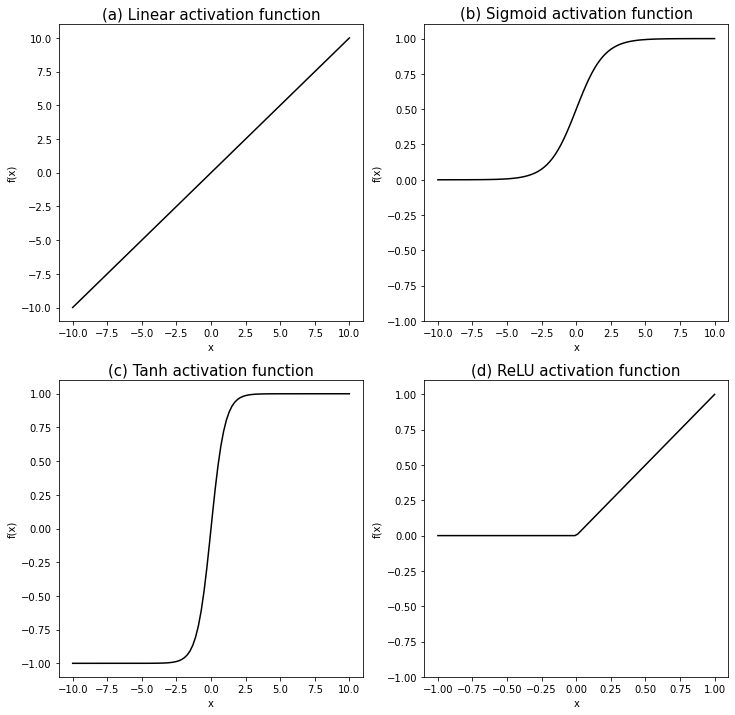

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
plot_params = {"c": "k"}
title_params = {"fontdict": {"fontsize": 15}}

# Linear activation function
xs = np.linspace(-10, 10, 100)
ax1.plot(xs, xs, **plot_params)
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.set_title("(a) Linear activation function", **title_params)

# Sigmoid activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))
ax2.set_ylim(-1, 1.1)
ax2.plot(xs, sigmoid(xs), **plot_params)
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
ax2.set_title("(b) Sigmoid activation function", **title_params)

# Tanh activation function
tanh = lambda x: (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)
ax3.plot(xs, tanh(xs), **plot_params)
ax3.set_xlabel("x")
ax3.set_ylabel("f(x)")
ax3.set_title("(c) Tanh activation function", **title_params)

# ReLU activation function
xs = np.linspace(-1, 1, 100)
relu = lambda x: np.maximum(x, 0)
ax4.set_ylim(-1, 1.1)
ax4.plot(xs, relu(xs), **plot_params)
ax4.set_xlabel("x")
ax4.set_ylabel("f(x)")
ax4.set_title("(d) ReLU activation function", **title_params)

# Plot/save
if save_to_tex:
    tikzplotlib.clean_figure(fig=fig)
    tikzplotlib.save(
        join(output_dir, "common-activation-functions.tex"),
        axis_height="5cm",
        axis_width="5cm",
        extra_groupstyle_parameters={"vertical sep=2.5cm", "horizontal sep=4cm"}
    )
else:
    plt.show()

# Curse of dimensionality

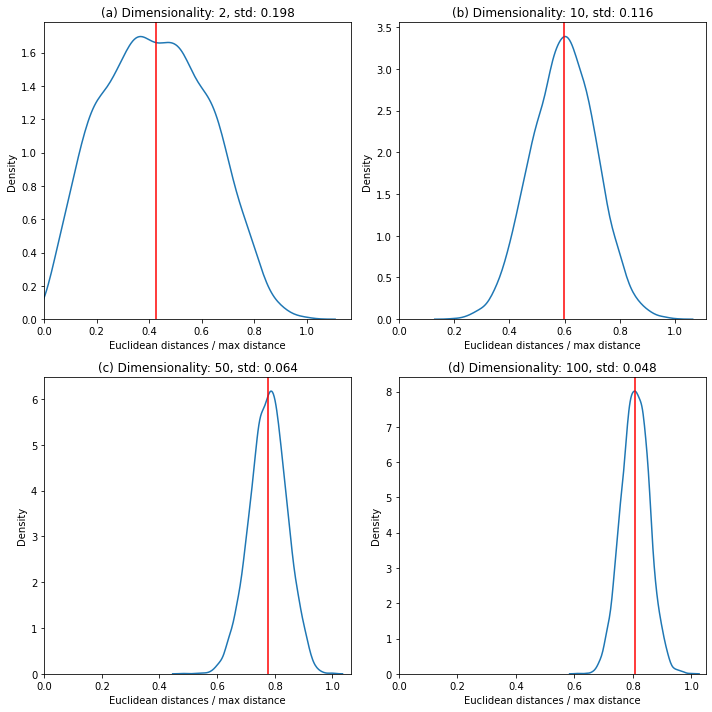

In [4]:
num_points = 100
cod_dims = [2, 10, 50, 100]
cod_dims_chars = "abcd"
n_cols = 2
n_rows = 2
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(5 * n_cols, 5 * n_rows),
)
for dims, dim_char, ax in zip(cod_dims, cod_dims_chars, axes.ravel()):
    
    # Generate points
    points = np.zeros((num_points, dims))
    for dim in range(dims):
        points[:, dim] = np.random.uniform(low=0, high=100, size=num_points)
    
    # Compute pairwise distances
    points_pairwise_dists = pdist(points)
    points_pairwise_dists_norm = points_pairwise_dists / points_pairwise_dists.max()
    points_pairwise_dists_norm_mean = np.mean(points_pairwise_dists_norm)

    sns.kdeplot(points_pairwise_dists_norm, ax=ax)
    
    #ax.plot(np.histogram(points_pairwise_dists_norm, bins="auto")[0])
    ax.axvline(points_pairwise_dists_norm_mean, ymin=0, ymax=np.max(points_pairwise_dists_norm), c="r")
    ax.set_title(f"({dim_char}) Dimensionality: {dims}, std: {np.std(points_pairwise_dists_norm):0.3f}")
    ax.set_xlabel("Euclidean distances / max distance")
    ax.set_ylabel("Density")
    ax.set_xlim(left=0)
    #ax.legend([f"Mean of points={points_pairwise_dists_norm_mean:0.3f}", "100 uniformly distributed points"])
plt.tight_layout()

# Plot/save
if save_to_tex:
    #tikzplotlib.clean_figure(fig=fig)
    tikzplotlib.save(
        join(output_dir, "curse-of-dimensionality.tex"),
        axis_height="6cm",
        axis_width="6cm",
        extra_groupstyle_parameters={"vertical sep=3cm", "horizontal sep=4cm"}
    )
else:
    plt.show()